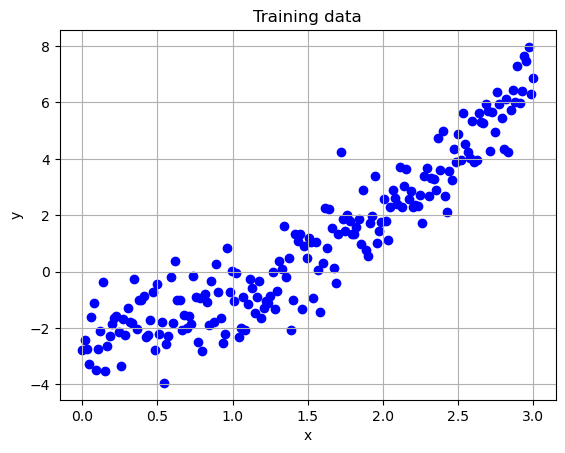

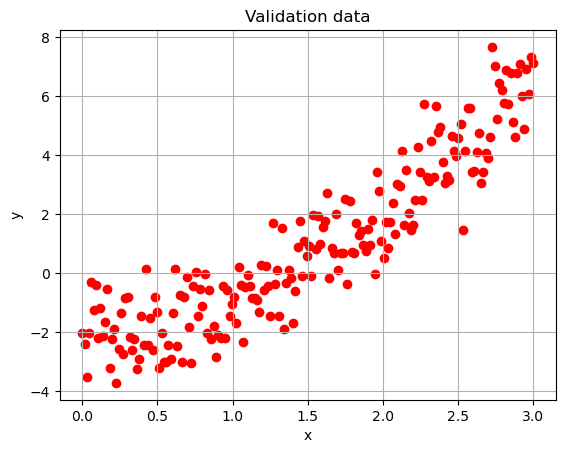

In [157]:
import numpy as np
import matplotlib.pyplot as plt


def plot_data(X, Y, color, title):
    plt.figure()
    plt.scatter(X, Y, color=color)
    plt.grid()
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")

data = np.loadtxt('data.dat')
X_train = data[:,0]
Y_train = data[:,1]
X_val = data[:,2]
Y_val = data[:,3]

plot_data(X_train, Y_train, "blue", "Training data")
plot_data(X_val, Y_val, "red", "Validation data")


Create a baseline linear model (dense layer with 1 unit node) and store the instance of this class in a variable called model.

Compile model using:

- the mean squared error as loss function,
- the tensorflow.keras.optimizers.SGD class with learning rate 0.01 as optimizer.

Perform a fit with model.
- fit with full batch size and 500 epochs. Monitor the validation data during epochs.

- Plot the loss function for training and validation using the history object returned by model.fit.

- Plot the model prediction on top of data.

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

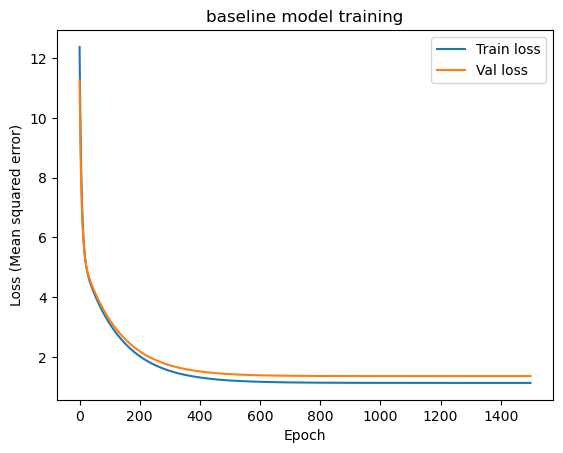

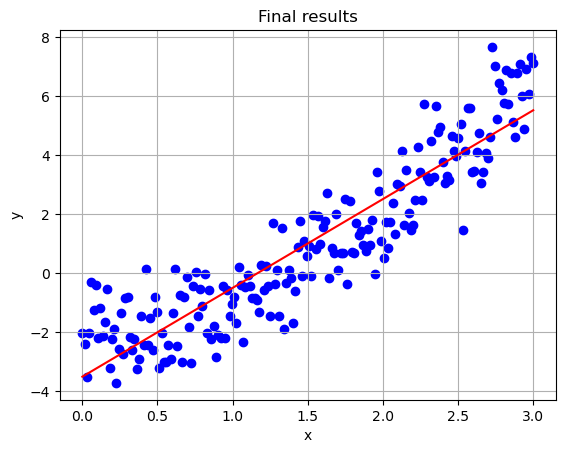

In [159]:

import tensorflow as tf

def baseline_model():
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(1, input_shape=(1,)))
    model.compile(tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')
    return model

def plot_history(history, title):
    plt.figure()
    plt.plot(history.epoch, np.array(history.history["loss"]), label="Train loss")
    plt.plot(history.epoch, np.array(history.history["val_loss"]), label="Val loss")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss (Mean squared error)")
    plt.legend()


def plot_results(X, Y, Y_predict, title):
    plt.figure()
    plt.scatter(X, Y, color="blue")
    plt.plot(X, Y_predict, color="red")
    plt.grid()
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")

#create model
model=baseline_model()
model.summary()
#train model 
history=model.fit(X_train, Y_train, batch_size=X_train.shape[0], epochs=1500, validation_data= (X_val, Y_val), verbose=0)#model.fit returns a dictionary with quantities of interest for the training
#plot training results
plot_history(history, "baseline model training")
#plot prediction above data
plot_results(X_val, Y_val, model(X_val), "Final results")


Build a neural network model with 3 layers containing 10 nodes each and relu activation function
and a last layer with a single unit and linear activation function.


- Perform a fit using the same setup in 4-6.


- Plot the loss function history for training and validation.


- Plot the model prediction on top of data.

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251 (1004.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

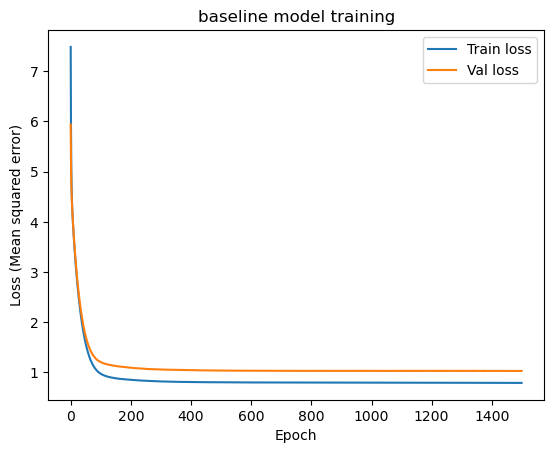

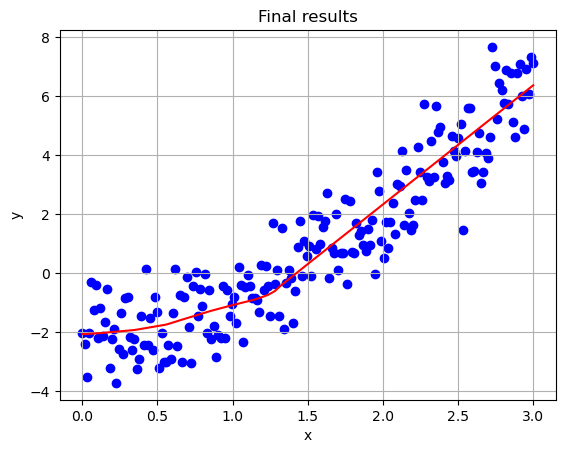

In [160]:


NN=tf.keras.models.Sequential([tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
                               tf.keras.layers.Dense(10, activation='relu'),
                               tf.keras.layers.Dense(10, activation='relu'),
                               tf.keras.layers.Dense(1, activation='linear')])
NN.summary()
NN.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')

historynn=NN.fit(X_train, Y_train, batch_size=X_train.shape[0], epochs=1500, validation_data=(X_val, Y_val), verbose=0)

plot_history(historynn, "baseline model training")
#plot prediction above data
plot_results(X_val, Y_val, NN(X_val), "Final results")

                               



Exercise 2 - Classification with sequential model
Write a ML classification model using keras with the following steps:

Data loading:

    Load the fashion mnist dataset from tensorflow.keras.datasets.fashion_mnist.
    Study the dataset size (pixel shape) and plot some sample images. 
    his dataset contains the following classes:
    ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'].

    Normalize images for training and test, considering the maximum pixel value of 255.

NN model fit:

    Build a NN model with flattens images and applies 2 dense layers with 128 and 10 units respectively.
    The first layer uses relu while the last layer softmax. Determine the number of trainable parameters.

    Fit the dataset with 5 epochs, using adam's optimizer, and the sparse_categorical_crossentropy loss function.
    The Sequential.compile method supports extra arguments, such as metrics=['accuracy'] 
    in order to monitor extra statistical estimators during epochs.

    Evaluate test accuracy.

    Identify examples of bad classification.

 x shape=(60000, 28, 28)
 y shape=(60000,)
min=0.0, max=1.0
size=(60000, 28, 28)


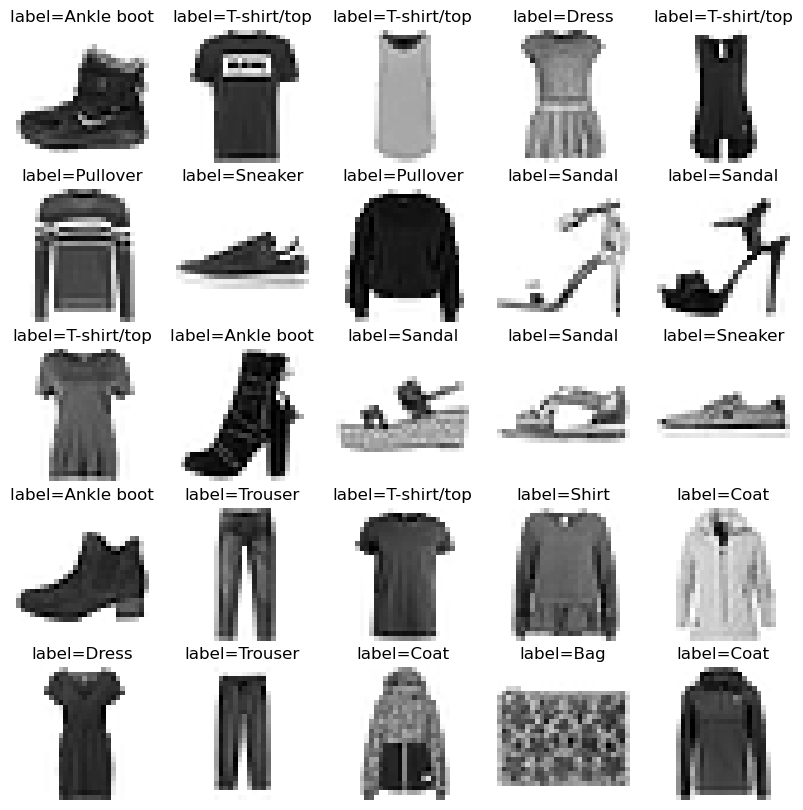

In [161]:

#data loading
def subplots(ax, x, y, title, xlabel="epochs"):
    ax.plot(x,y, color='goldenrod')
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.grid(True)

(x_train, y_train), (x_test,y_test)= tf.keras.datasets.fashion_mnist.load_data() 
print(f" x shape={x_train.shape}") #(60000,28,28)= 60000 images (matrix), of size 28x28
print(f" y shape={y_train.shape}") #(60000,)=60000 labels (values from 0 to 9)
#normalize images
x_train=x_train.astype("float32")/255.0 #tf.cast only use is to change variable type, not to resize, so here numpy works better
x_test=x_test.astype("float32")/255.0 #test dataset is used after the training to evaluate the nn performance on new data

#show normalization
print(f"min={x_train.min()}, max={x_train.max()}") #if normalized should be [0,1]
print(f"size={x_train.shape}")
labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
#plot some sample images
N=5
fig, ax = plt.subplots(N,N, figsize=(10,10))
ax=ax.flatten()
for i in range(N**2):
    ax[i].imshow(x_train[i], cmap=plt.cm.binary )
    ax[i].axis("off")
    ax[i].set_title(f"label={labels[y_train[i]]}")
plt.show()

def build_model():
    model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), #input layer which flattens the image
                                      tf.keras.layers.Dense(128, activation='relu'), #flattening input as a column vector
                                      tf.keras.layers.Dense(10, activation='softmax')])#10 neurons because of 10 classes! remind that softmax return a PDF
    return model

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 745us/step - accuracy: 0.7811 - loss: 0.6333
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.8635 - loss: 0.3812
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.8767 - loss: 0.3398
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.8841 - loss: 0.3137
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - accuracy: 0.8911 - loss: 0.2956
accuracy  during training (correct_predictions/total_attempts)=[0.8240166902542114, 0.865149974822998, 0.8760166764259338, 0.8838499784469604, 0.8923333287239075]


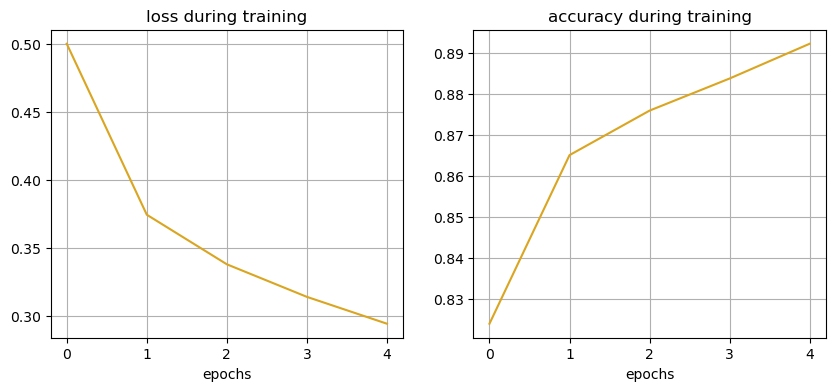

In [162]:
#NN model fit

model=build_model()
model.summary()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) 

#SCCE loss is L=-log(pi) where pi is the probability assigned at the class i by the softmax,
#used when the classification is not one hot encoded (here i sue cross entropy
epochs=np.arange(5)
history=model.fit(x_train, y_train, epochs=len(epochs)) #no validation data here

print(f"accuracy  during training (correct_predictions/total_attempts)={history.history["accuracy"]}") #accuracy= correct predictions/total attempts
#nb: history is not a dictionary! to access its member use the .history[""] method
#print training quantities
fig, ax=plt.subplots(1,2, figsize=(10,4))
ax=ax.flatten()
subplots(ax[0], epochs, history.history["loss"], "loss during training")

subplots(ax[1], epochs, history.history["accuracy"], "accuracy during training")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8799 - loss: 0.3403
test set accuracy=0.8773999810218811
test set loss=0.34231677651405334
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step


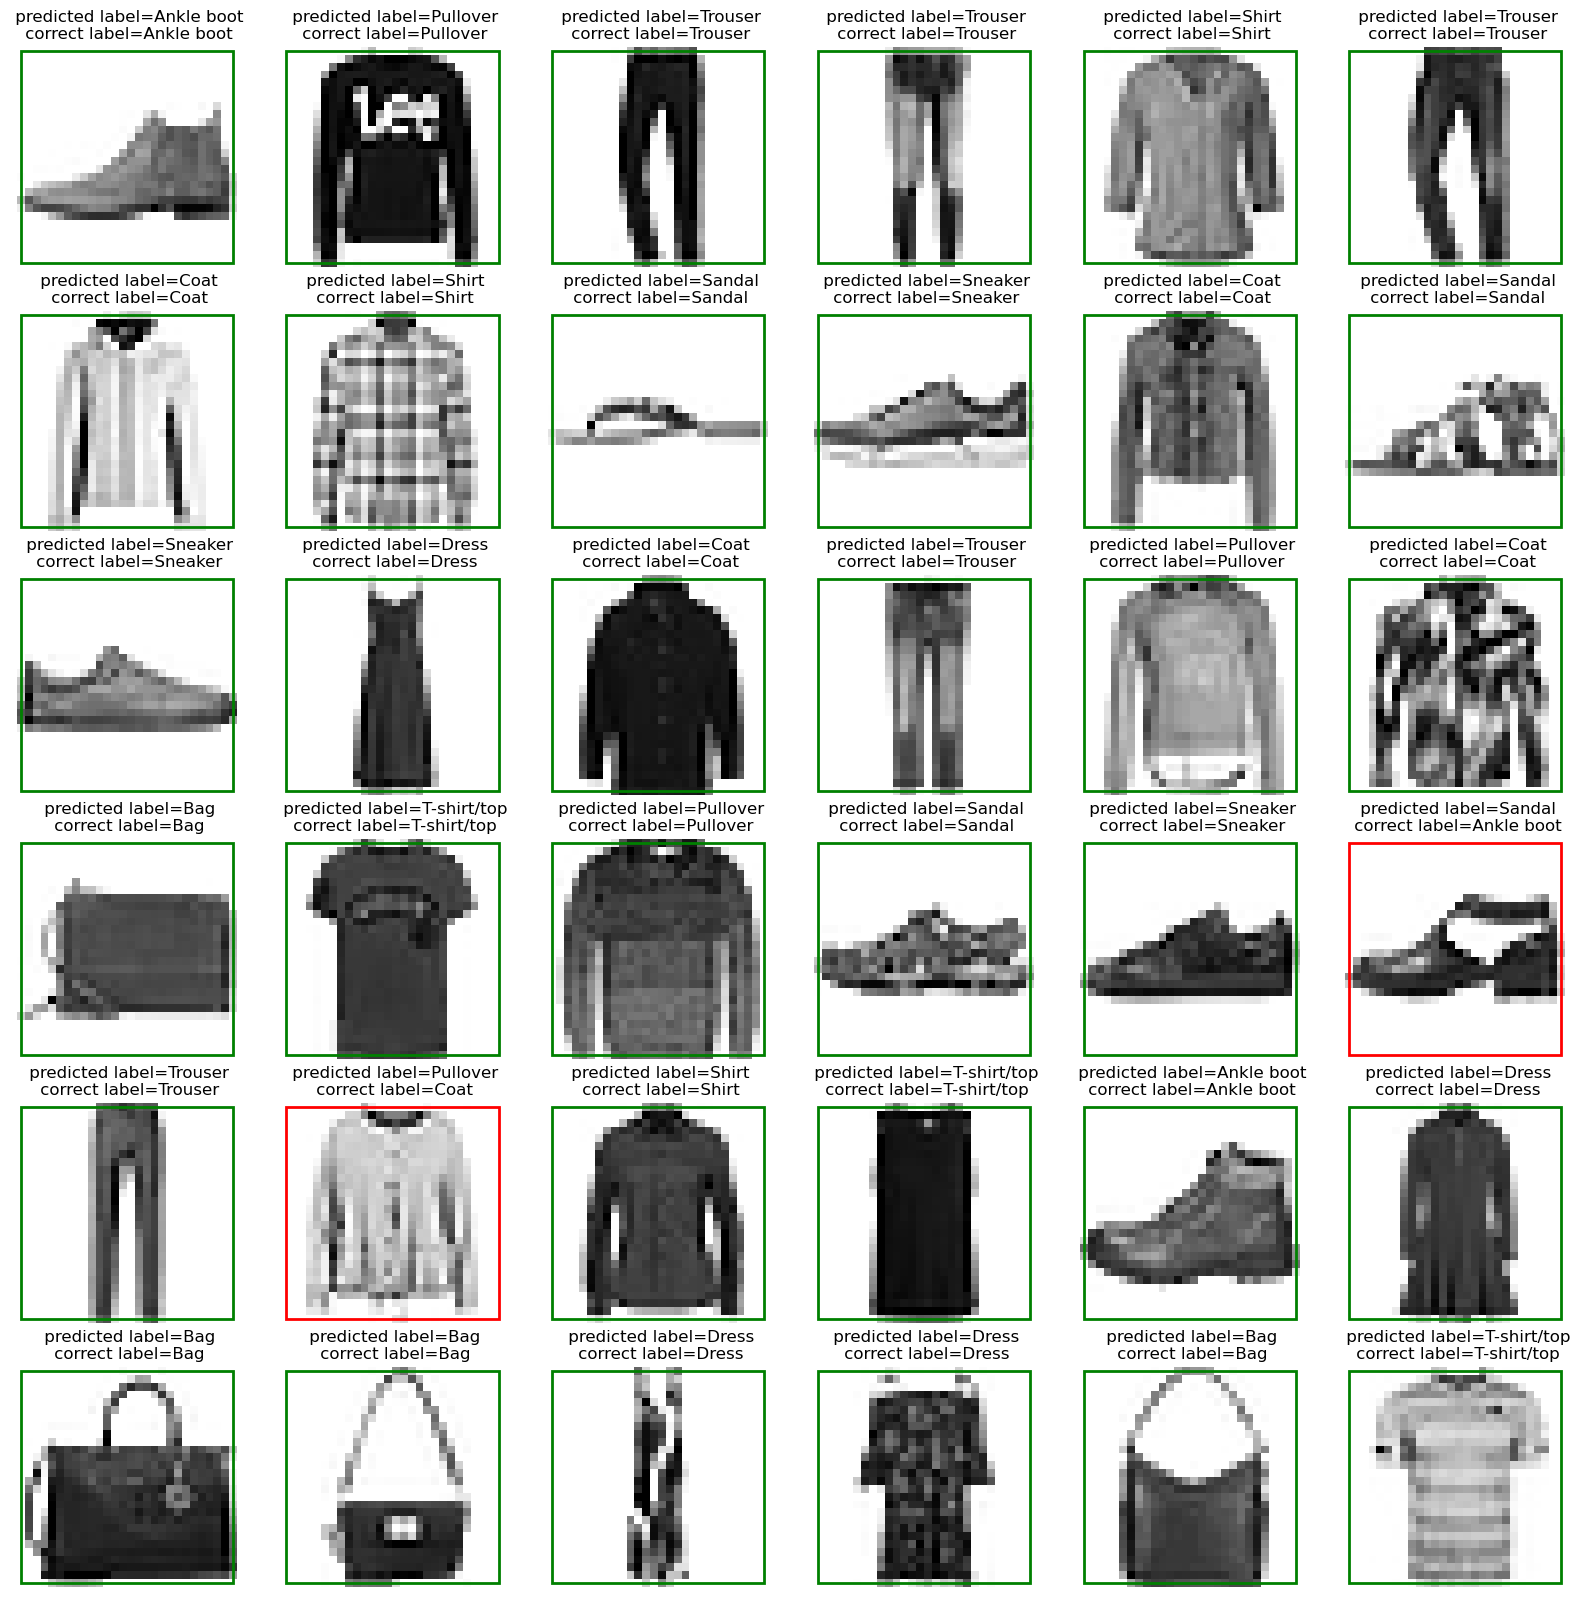

In [179]:
import matplotlib.patches as patches



#test the model on the test set and print results
test= model.evaluate(x_test, y_test, return_dict=True)
print(f"test set accuracy={test['accuracy']}")
print(f"test set loss={test['loss']}")
#plot some predictions

#generate predictions on the test set
predictions=model.predict(x_test) #prediction is a x_test.size()x10 matrix, because each output is a 10D row vector containing the softmax-assigned probability to each label
N=6
fig, ax = plt.subplots(N,N, figsize=(20,20))
ax=ax.flatten()
for i in range (N**2):
    if np.argmax(predictions[i])==y_test[i]:
        color='green' #np argmax return the index which contains the maximum value of an array (for a softmax it returns the index with the highest probability)
    else:
        color='red'
    ax[i].imshow(x_test[i],  cmap=plt.cm.binary )
    
    # aggiungo rettangolo colorato come bordo
    rect = patches.Rectangle((0,0), 27, 27, linewidth=2,edgecolor=color, facecolor="none")
    ax[i].add_patch(rect)

    ax[i].axis("off")
    
    ax[i].set_title(f" predicted label={labels[np.argmax(predictions[i])]}\n correct label={labels[y_test[i]]}")
plt.show()


